In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\kotha\OneDrive\Desktop\ML_Project\Battery_dataset.csv")

In [3]:
df.head()

,battery_id,cycle,chI,chV,chT,disI,disV,disT,BCt,SOH,RUL
0,B5,1,1.440147,4.254682,23.988733,1.894407,3.273523,32.980834,1.986196,99.309790,219
1,B5,2,1.416595,4.159825,25.665347,1.829949,4.038741,32.257920,1.986240,99.311985,218
2,B5,3,1.420272,4.276323,25.407910,1.942105,3.214433,35.134801,1.984252,99.212608,217
3,B5,4,1.337680,4.236697,27.069757,2.073577,3.134529,32.082988,1.969236,98.461812,216
4,B5,5,1.263946,4.142791,26.478353,2.049885,3.729341,32.483154,1.974862,98.743106,215


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   battery_id  680 non-null    object 
 1   cycle       680 non-null    int64  
 2   chI         680 non-null    float64
 3   chV         680 non-null    float64
 4   chT         680 non-null    float64
 5   disI        680 non-null    float64
 6   disV        680 non-null    float64
 7   disT        680 non-null    float64
 8   BCt         680 non-null    float64
 9   SOH         680 non-null    float64
 10  RUL         680 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 58.6+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cycle,680.0,114.470588,66.601594,1.000000,57.000000,114.000000,170.250000,250.000000
chI,680.0,1.400069,0.102903,1.000859,1.333381,1.401904,1.469383,1.747515
chV,680.0,4.202765,0.046973,4.035078,4.170685,4.202503,4.235014,4.359233
chT,680.0,26.871113,1.489824,21.604784,25.822944,26.823350,27.944619,30.913077
disI,680.0,2.007630,0.097797,1.702438,1.945474,2.006990,2.066924,2.411226
disV,680.0,3.501070,0.304160,2.484857,3.299257,3.496967,3.718415,4.363548
disT,680.0,33.099894,1.827415,26.848457,31.910717,33.105426,34.328265,38.388721
BCt,680.0,1.427851,0.333250,0.750972,1.146314,1.429413,1.713894,1.993692
SOH,680.0,71.392565,16.662488,37.548593,57.315723,71.470656,85.694686,99.684587
RUL,680.0,113.470588,66.601594,0.000000,56.000000,113.000000,169.250000,249.000000


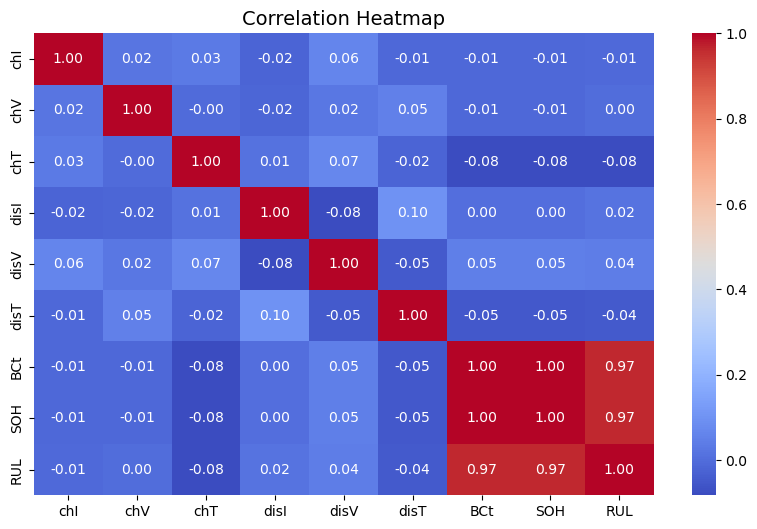

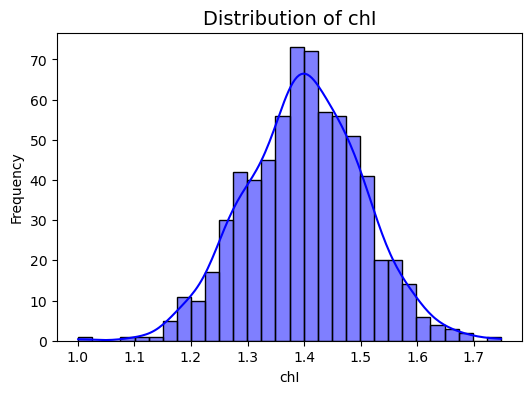

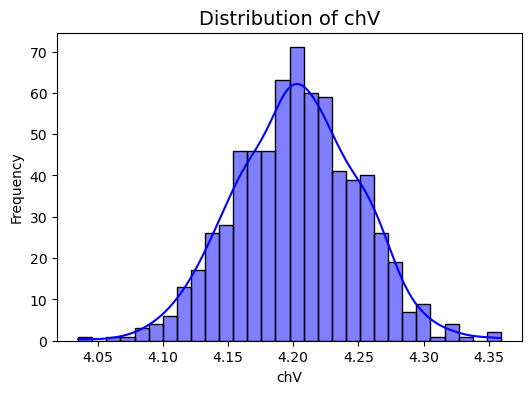

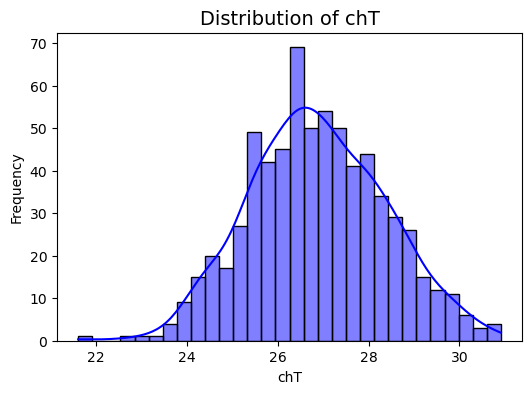

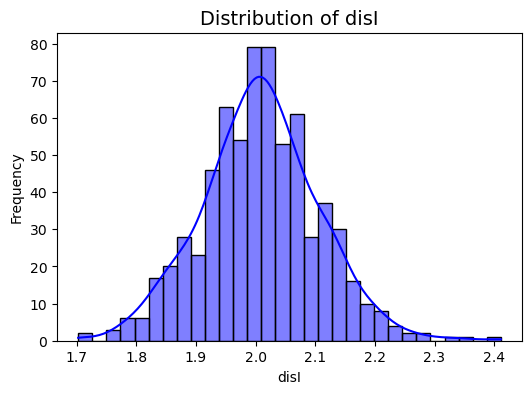

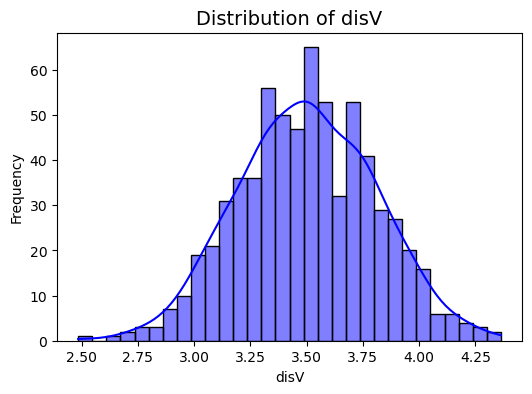

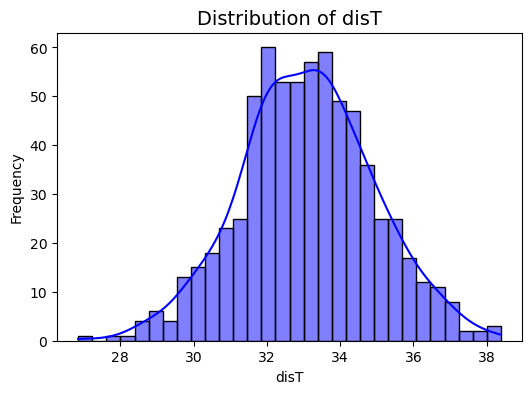

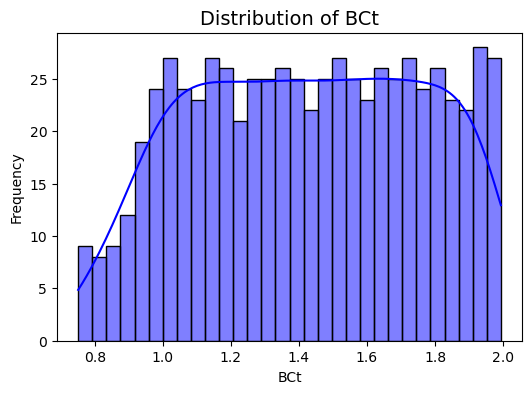

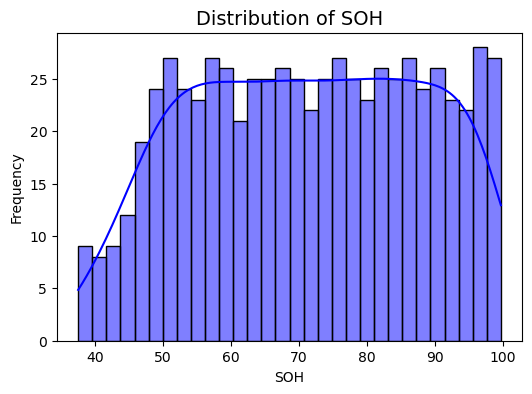

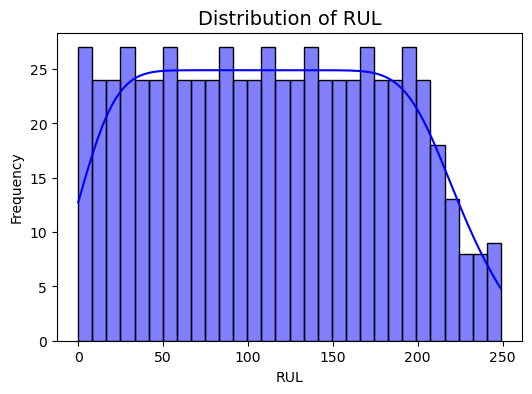

In [6]:
numeric_cols = ['chI', 'chV', 'chT', 'disI', 'disV', 'disT', 'BCt', 'SOH', 'RUL']

plt.figure(figsize=(10, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


for feature in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}", fontsize=14)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

Binaryclassification

In [7]:
threshold = df["RUL"].median()
df["RUL_class"] = (df["RUL"] <= threshold).astype(int)

In [8]:
df.head()

,battery_id,cycle,chI,chV,chT,disI,disV,disT,BCt,SOH,RUL,RUL_class
0,B5,1,1.440147,4.254682,23.988733,1.894407,3.273523,32.980834,1.986196,99.309790,219,0
1,B5,2,1.416595,4.159825,25.665347,1.829949,4.038741,32.257920,1.986240,99.311985,218,0
2,B5,3,1.420272,4.276323,25.407910,1.942105,3.214433,35.134801,1.984252,99.212608,217,0
3,B5,4,1.337680,4.236697,27.069757,2.073577,3.134529,32.082988,1.969236,98.461812,216,0
4,B5,5,1.263946,4.142791,26.478353,2.049885,3.729341,32.483154,1.974862,98.743106,215,0


In [9]:
df['RUL_class'].value_counts()

RUL_class
1    342
0    338
Name: count, dtype: int64

In [18]:
df.drop(columns=['battery_id','RUL'],inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cycle      680 non-null    int64  
 1   chI        680 non-null    float64
 2   chV        680 non-null    float64
 3   chT        680 non-null    float64
 4   disI       680 non-null    float64
 5   disV       680 non-null    float64
 6   disT       680 non-null    float64
 7   BCt        680 non-null    float64
 8   SOH        680 non-null    float64
 9   RUL_class  680 non-null    int32  
dtypes: float64(8), int32(1), int64(1)
memory usage: 50.6 KB


In [20]:
df.head()

,cycle,chI,chV,chT,disI,disV,disT,BCt,SOH,RUL_class
0,1,1.440147,4.254682,23.988733,1.894407,3.273523,32.980834,1.986196,99.309790,0
1,2,1.416595,4.159825,25.665347,1.829949,4.038741,32.257920,1.986240,99.311985,0
2,3,1.420272,4.276323,25.407910,1.942105,3.214433,35.134801,1.984252,99.212608,0
3,4,1.337680,4.236697,27.069757,2.073577,3.134529,32.082988,1.969236,98.461812,0
4,5,1.263946,4.142791,26.478353,2.049885,3.729341,32.483154,1.974862,98.743106,0


Randomforest Classifier

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
✅ Best Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
✅ Best Cross-Validation Accuracy: 0.9982

✅ Accuracy: 100.00%

✅ Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        67

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



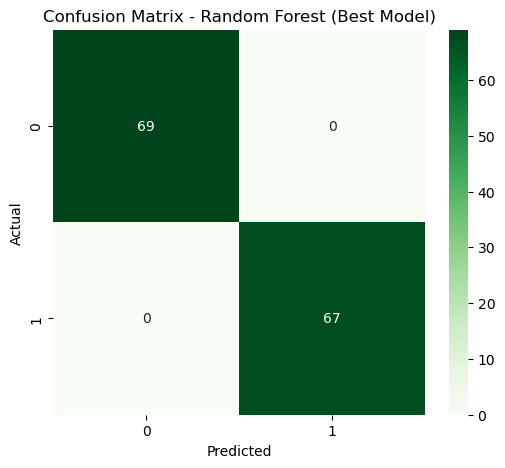

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1. Prepare data
# -------------------------------
# Assuming df is already loaded and contains 'RUL_class'
X = df.drop('RUL_class', axis=1)
y = df['RUL_class']

# Handle categorical features by One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 2. Random Forest + Hyperparameter Tuning
# -------------------------------
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# -------------------------------
# 3. Best model results
# -------------------------------
best_model = grid_search.best_estimator_

print("✅ Best Parameters:", grid_search.best_params_)
print(f"✅ Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Predict on test set
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {accuracy * 100:.2f}%")




# Classification report
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (Best Model)")
plt.show()


Fitting 3 folds for each of 11664 candidates, totalling 34992 fits
✅ Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
✅ Best Cross-Validation Accuracy: 0.9945

✅ Test Accuracy: 100.00%

✅ Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        67

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



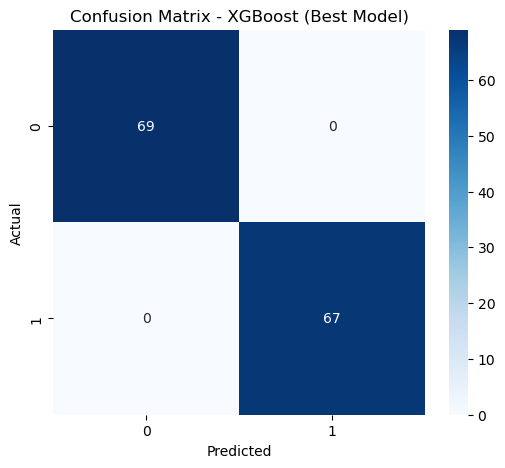

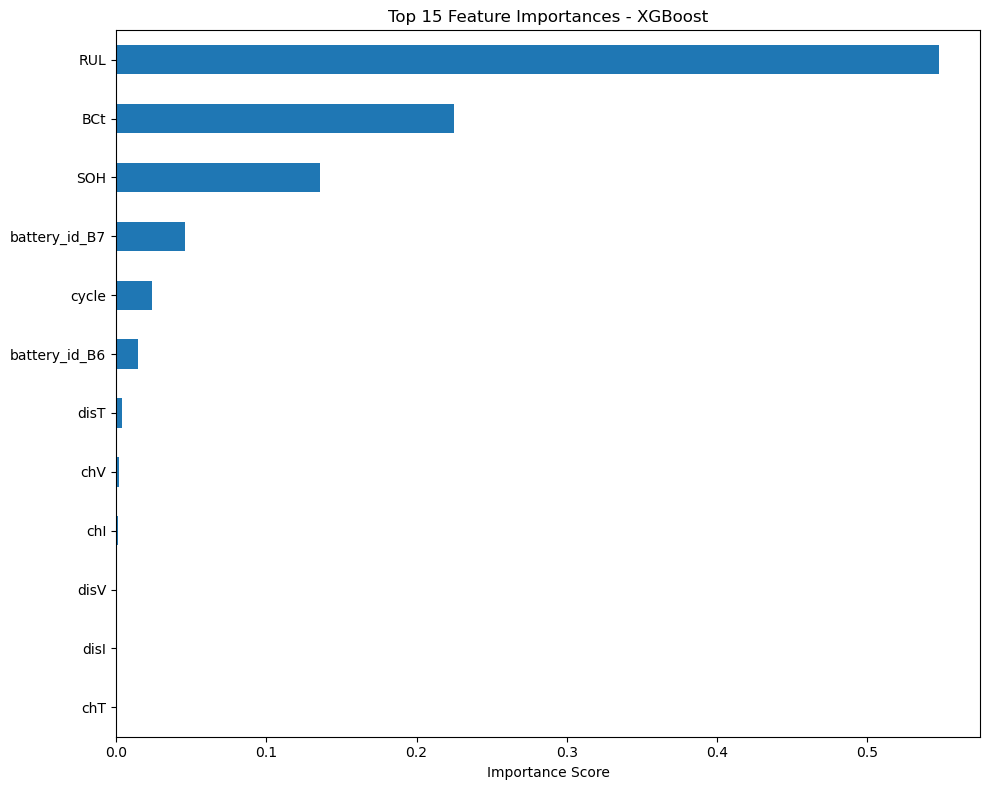

In [16]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1. Prepare data
# -------------------------------
# Assuming df is already loaded and contains 'RUL_class'
X = df.drop('RUL_class', axis=1)
y = df['RUL_class']

# Handle categorical features by One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# For XGBoost, it's recommended to encode labels if they are strings
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 2. XGBoost + Hyperparameter Tuning
# -------------------------------
xgb_model = XGBClassifier(random_state=42, verbosity=0)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# -------------------------------
# 3. Best model results
# -------------------------------
best_model = grid_search.best_estimator_

print("✅ Best Parameters:", grid_search.best_params_)
print(f"✅ Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Predict on test set
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix - FIXED VERSION
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost (Best Model)")
plt.show()

# Feature importance
plt.figure(figsize=(10, 8))
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importances.nlargest(15).sort_values().plot(kind='barh')
plt.title('Top 15 Feature Importances - XGBoost')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

Fitting 2 folds for each of 500 candidates, totalling 1000 fits
[LightGBM] [Info] Number of positive: 275, number of negative: 269
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1606
[LightGBM] [Info] Number of data points in the train set: 544, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505515 -> initscore=0.022060
[LightGBM] [Info] Start training from score 0.022060
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

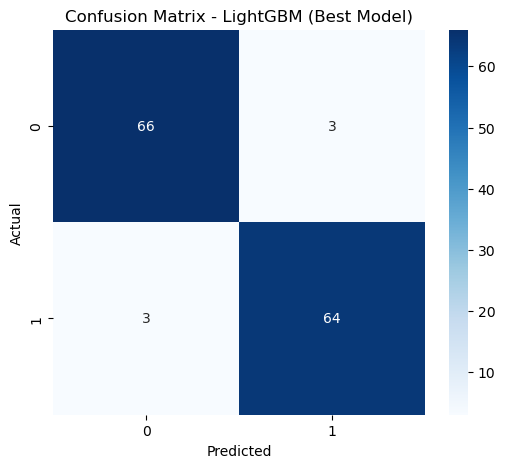

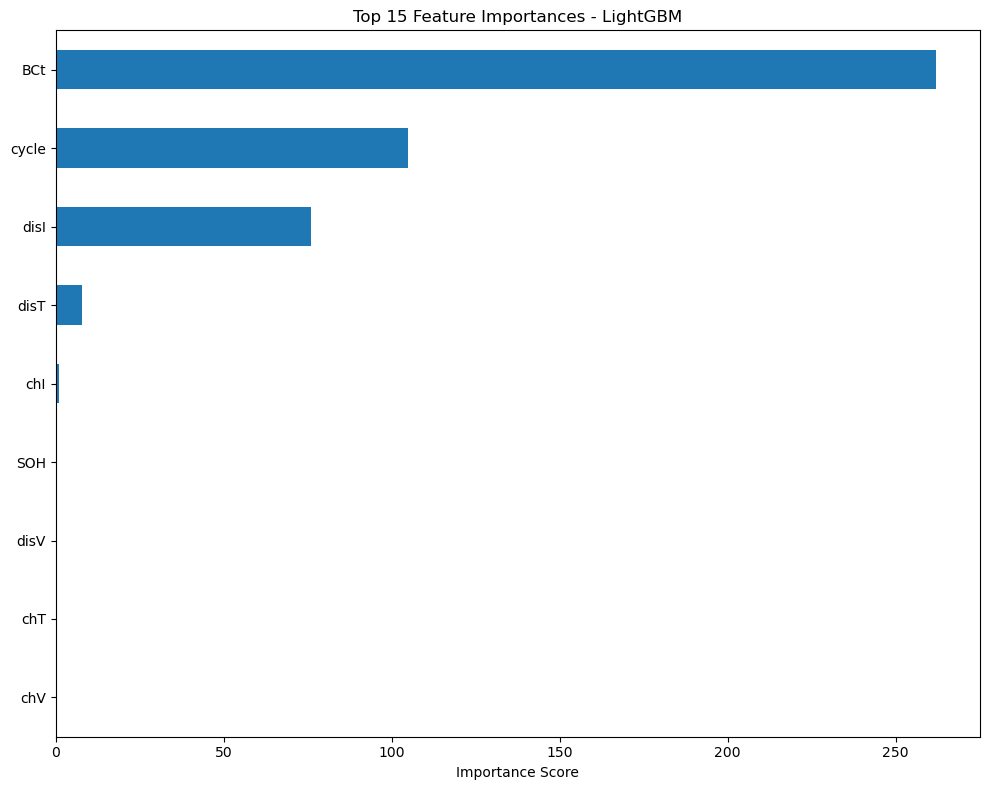


✅ Test Accuracy: 95.59%


In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# 1. Prepare data
# -------------------------------
X = df.drop('RUL_class', axis=1)
y = df['RUL_class']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Encode labels if they are strings
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 2. LightGBM + RandomizedSearchCV
# -------------------------------
lgb_model = lgb.LGBMClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, -1],
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 1, 1.5]
}

random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=500,          
    scoring='accuracy',
    cv=2,               # fewer folds for speed
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

# -------------------------------
# 3. Best model results
# -------------------------------
best_model = random_search.best_estimator_

print("✅ Best Parameters:", random_search.best_params_)
print(f"✅ Best Cross-Validation Accuracy: {random_search.best_score_:.4f}")

# Predict on test set
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM (Best Model)")
plt.show()

# Feature importance
plt.figure(figsize=(10, 8))
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importances.nlargest(15).sort_values().plot(kind='barh')
plt.title('Top 15 Feature Importances - LightGBM')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")
